In [ ]:
!pip install understat
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()

import asyncio
import json
import aiohttp
from understat import Understat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
async def get_table(year):
    async with aiohttp.ClientSession() as session:
        understat = Understat(session)
        table = await understat.get_league_table("EPL", year)
        # print(table)
        return table

loop = asyncio.get_event_loop()
table = loop.run_until_complete(get_table("2020"))



In [ ]:
seasons = ["2014","2015","2016","2017","2018","2019","2020"]
wins_all = []
draws_all= []
for season in seasons:
  table = loop.run_until_complete(get_table(season))
  wins = 0
  draws = 0
  for row in table[1:]:
    wins+=row[2]
    draws+=row[3]
  draws/=2
  wins_all.append(wins)
  draws_all.append(draws)

In [ ]:
win_prop = np.divide(wins_all,draws_all)
win_prop_mean_excl_2020 = np.mean(np.divide(wins_all[:-1],draws_all[:-1]))


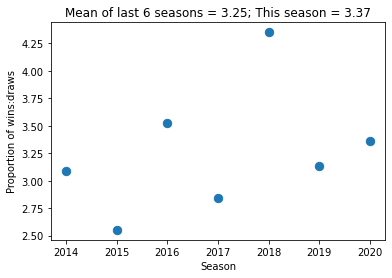

In [ ]:
plt.figure()
plt.scatter(seasons,win_prop,s = 70)
plt.title("Mean of last 6 seasons = {:.2f}; This season = {:.2f}".format(win_prop_mean_excl_2020,wins_all[-1]/draws_all[-1]))
plt.xlabel("Season")
plt.ylabel("Proportion of wins:draws")
plt.show()